255


Downloading...
From: https://drive.google.com/uc?id=15LSYaKYgg9GrVJgwSE_dBTPDefqShAaD
To: C:\Users\signo\dati.txt
100%|██████████| 771k/771k [00:00<00:00, 6.20MB/s]


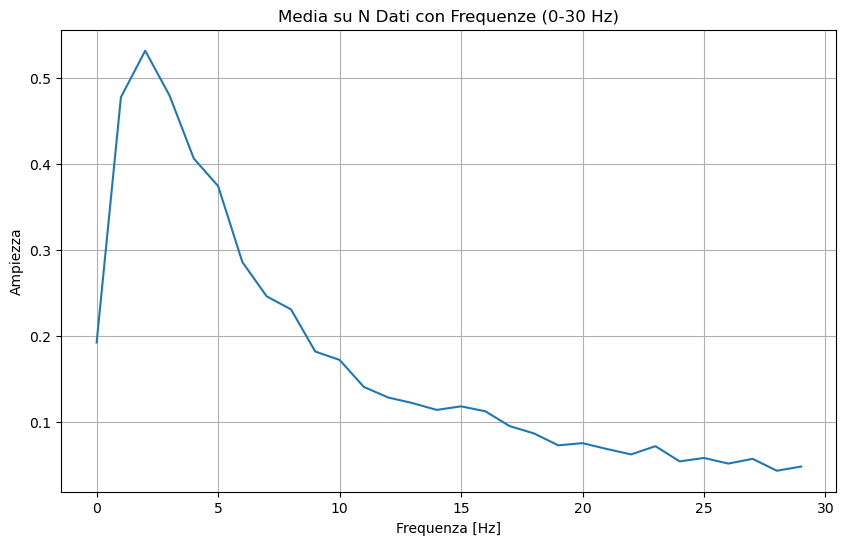

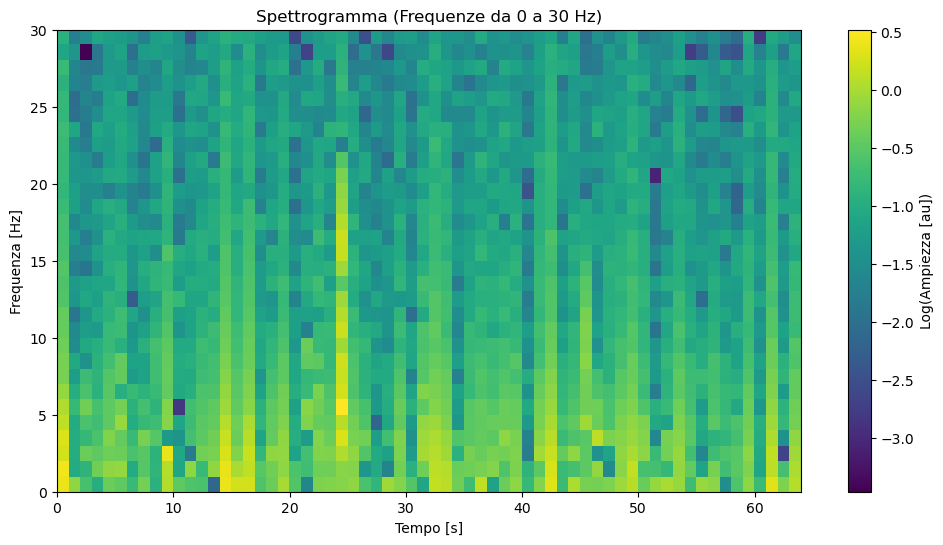

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from Lettura_Dati import leggi_file #importo funzione x leggere file
from background_singoloframe import Background_unFrame
import gdown
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from matplotlib.backends.backend_pdf import PdfPages
import os

#background
bg = Background_unFrame()
background= np.array(bg)

print(background.size)
# Link con l'ID del file
file_url = "https://drive.google.com/uc?id=15LSYaKYgg9GrVJgwSE_dBTPDefqShAaD"
# Scarica il file da Google Drive
gdown.download(file_url, 'dati.txt', quiet=False)

# Leggi il file
file_path = "dati.txt"
frames = leggi_file(file_path)
frames_array = np.array(frames)
frames = leggi_file(file_path)

frames_array = np.array(frames)

# fft tutti i frame 
spectrogram = np.zeros((len(frames_array), 256//2), dtype=float)
for i, frame in enumerate(frames_array):
    # fft frame corrente
    yf_high = fft(frame[0:256], axis=0)
    spectrogram[i, :] = np.abs(yf_high[:256//2])

T_frame = 1 
tempo_totale = len(frames_array) * T_frame #tmepo tot=nFrame*Tframe
xf = fftfreq(256, T_frame/256)[:256//2]
t = np.linspace(0, tempo_totale, len(frames))

spectrogram_without_baseline = spectrogram - background[:256//2] #calcolo lo spectrogram senza background
# parte reale
spectrogram_without_baseline_real = np.real(spectrogram_without_baseline)

# ADESSO FACCIO LO SPETTROGRAMMA PRENDENDO SOLO LE FREQUENZE DA 0 A 30 HZ
# cerco in xf le freq che stanno tra 0 e 30
freq_min=0
freq_max=30
idx_freq_min = np.argmax(xf >= freq_min)
idx_freq_max = np.argmax(xf >= freq_max)

# prendo solo le ampiezze corrispondenti 
amplitudes_selected = spectrogram_without_baseline_real[:, idx_freq_min:idx_freq_max]

# calcolo la media
mean_ampl = np.mean(amplitudes_selected, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(xf[idx_freq_min:idx_freq_max], mean_ampl)
plt.xlabel('Frequenza [Hz]')
plt.ylabel('Ampiezza')
plt.title('Media su N Dati con Frequenze (0-30 Hz)')
plt.grid(True)
plt.show()

# plotto lo spettrogramma in 2D
log_spectrogram = np.log10(np.abs(spectrogram_without_baseline_real) + 1e-10)  # + 1e-10 per evitare il log di zero
plt.figure(figsize=(12, 6))
plt.imshow(log_spectrogram[:, idx_freq_min:idx_freq_max].T, aspect='auto', extent=[0, tempo_totale, freq_min, freq_max], origin='lower')#.T x farla verficale
plt.colorbar(label='Log(Ampiezza [au])')
plt.xlabel('Tempo [s]')
plt.ylabel('Frequenza [Hz]')
plt.title('Spettrogramma (Frequenze da 0 a 30 Hz)')
plt.show()